In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

workdir = "/home/sequser/ResNetIC50/MEYODG-51K"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]

dataset = np.load(workdir + "/MEYODG51K_dataset.npz") # input file
ss0 = np.load(workdir + '/MEYODG51K_dataset_r2.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

4 15


In [6]:
x.shape

(51787, 79724)

In [7]:
training_image_array.shape

(46609, 79724)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
# train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
# test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
# #input_shape = (img_rows, img_cols, 1)

In [10]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(46609, 79724) (46609,) (5178, 79724) (5178,)


In [11]:
inds = np.where(np.isnan(test_X))

In [12]:
inds

(array([], dtype=int64), array([], dtype=int64))

In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (46609, 79724)
46609 train samples
5178 test samples


In [14]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Fit regression model
model = SVR(C=0.01)
y_lin = model.fit(train_X, train_y).predict(test_X)


In [15]:
import matplotlib
from matplotlib import pyplot as plt

In [16]:
y_lin

array([2.52138322, 2.48453171, 1.72410175, ..., 2.64844437, 2.45786576,
       2.34879701])

In [17]:
import pickle
import joblib
workdir = "/home/sequser/ResNetIC50/result/MEYODG-51K/SVR"
joblib.dump(model, workdir + '/MEYODG51K_r2_SVR_model.pkl') 


['/home/sequser/ResNetIC50/result/MEYODG-51K/SVR/MEYODG51K_r2_SVR_model.pkl']

In [18]:
a = pd.DataFrame(y_lin)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [19]:
c.to_csv(workdir + '//MEYODG51K_r2_SVR_pred_obs_table.csv')

In [20]:
c

,Predicted,Test
0,2.521383,3.455613
1,2.484532,1.777574
2,1.724102,0.871086
3,2.646393,3.506734
4,2.418251,0.079714
...,...,...
5173,2.778456,3.918200
5174,2.797606,3.739676
5175,2.648444,2.720437
5176,2.457866,3.543666


In [21]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.02240831677078774, intercept=2.3728865231818532, rvalue=0.24841128484448854, pvalue=1.1456819771031769e-73, stderr=0.0012145341996519367, intercept_stderr=0.004184256116258614)

In [22]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.013928336794893137


In [23]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 2.7899792263919903


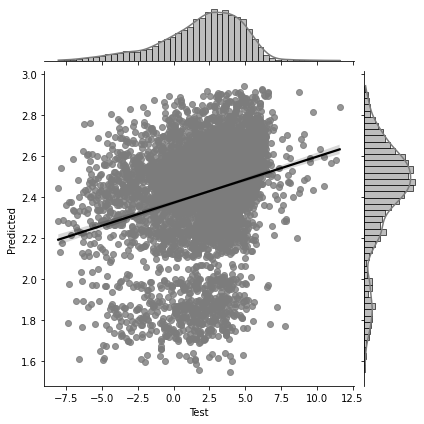

In [25]:
workdir = "/home/sequser/ResNetIC50/result/Figure/MEYODG-51K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '/MEYODG51K_r2_SVR.png', dpi=300)